In [34]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


# To Import File from Kaggle
1) Download Kaggle Json file from Kaggle account and upload on google colab  
2)Then copy API command of dataset from kaggel and pest in colab

In [35]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
import numpy as np

Here is data is is huge so we using generators for batch processing which suitable for our RAM and easy function

In [38]:
# generator

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Here we limit the pixel value between(0,1)
#Normalizing

In [39]:
def process(image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

# Creating CNN Model

In [40]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 1.3247 - accuracy: 0.5715 - val_loss: 0.6493 - val_accuracy: 0.5854
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6403 - accuracy: 0.6250 - val_loss: 0.6516 - val_accuracy: 0.6834
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6051 - accuracy: 0.6825 - val_loss: 0.6565 - val_accuracy: 0.6256
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5371 - accuracy: 0.7340 - val_loss: 0.5763 - val_accuracy: 0.6916
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4933 - accuracy: 0.7610 - val_loss: 0.5238 - val_accuracy: 0.7560
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4511 - accuracy: 0.7850 - val_loss: 0.4787 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3986 - accuracy: 0.8162 - val_loss: 0.4966 - val_ac

In [44]:
"""import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='testing Accuracy')
plt.legend()
plt.plot()"""

"import matplotlib.pyplot as plt\nplt.plot(history.history['accuracy'],color='red',label='training Accuracy')\nplt.plot(history.history['val_accuracy'],color='blue',label='testing Accuracy')\nplt.legend()\nplt.plot()"

here training accuracy increases as no of epochs increases but it not works welll for testing set

In [45]:
"""plt.plot(history.history['loss'],color='red',label='training Loss')
plt.plot(history.history['val_loss'],color='blue',label='testing Loss')
plt.legend()
plt.plot()"""

"plt.plot(history.history['loss'],color='red',label='training Loss')\nplt.plot(history.history['val_loss'],color='blue',label='testing Loss')\nplt.legend()\nplt.plot()"

its seems to be overfiting od model

[]

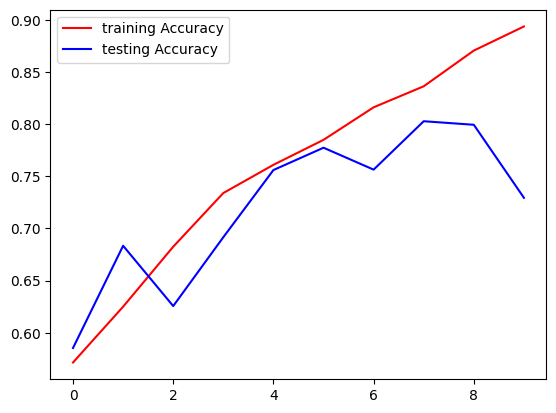

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='testing Accuracy')
plt.legend()
plt.plot()

[]

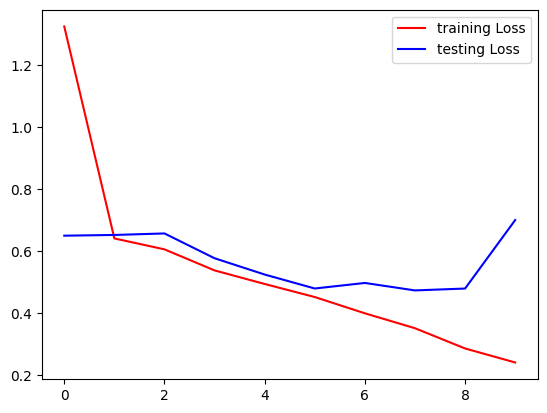

In [47]:
plt.plot(history.history['loss'],color='red',label='training Loss')
plt.plot(history.history['val_loss'],color='blue',label='testing Loss')
plt.legend()
plt.plot()

let's test for external image

(203, 248, 3)


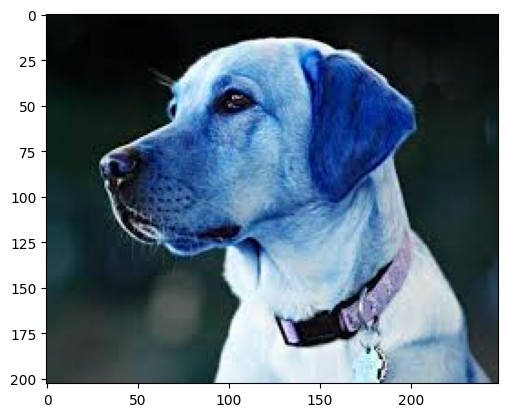

In [48]:
import cv2

test_img =cv2.imread('/content/dog.jfif')

plt.imshow(test_img)
print(test_img.shape)

ressizing

In [49]:
test_img =cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))

In [50]:
model.predict(test_input)    # 0 for cat and 1 for dog

1/1 [==============================] - 0s 184ms/step


array([[1.]], dtype=float32)